# Importing Python libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import cm
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from datetime import datetime
from keras.layers import Activation
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import VotingRegressor
from prettytable import PrettyTable


import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-danger">  
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
<h1><center><strong> NIO Stock</strong></center></h1>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
        
</div>

# ------------------------------------------------------------------------------------------------------

# Loading dataset

In [2]:
data = yf.Ticker("NIO")
data = data.history(period='10y')

# ------------------------------------------------------------------------------------------------------

# Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [3]:
data.head()

Open   High   Low  Close     Volume  Dividends  Stock Splits
Date                                                                     
2018-09-12   6.00   6.93  5.35   6.60   66849000          0             0
2018-09-13   6.62  12.69  6.52  11.60  158346500          0             0
2018-09-14  12.66  13.80  9.22   9.90  172473600          0             0
2018-09-17   9.61   9.75  8.50   8.50   56323900          0             0
2018-09-18   8.73   9.10  7.67   7.68   41827600          0             0

### Five last records of data

In [4]:
data.tail()

Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2021-07-14  44.840000  45.169998  42.680000  43.049999  56805800          0   
2021-07-15  43.259998  44.770000  42.680000  43.680000  55860400          0   
2021-07-16  43.849998  44.400002  42.400002  42.799999  49803000          0   
2021-07-19  41.490002  43.669998  40.480000  43.349998  65213000          0   
2021-07-20  43.599701  43.610001  42.430099  43.459999  26325334          0   

            Stock Splits  
Date                      
2021-07-14             0  
2021-07-15             0  
2021-07-16             0  
2021-07-19             0  
2021-07-20             0

### Coloumns/features in data

In [5]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Length of data

In [6]:
print('lenght of data is', len(data))

lenght of data is 718


### Shape of data

In [7]:
data.shape

(718, 7)

### Data information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 718 entries, 2018-09-12 to 2021-07-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          718 non-null    float64
 1   High          718 non-null    float64
 2   Low           718 non-null    float64
 3   Close         718 non-null    float64
 4   Volume        718 non-null    int64  
 5   Dividends     718 non-null    int64  
 6   Stock Splits  718 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 44.9 KB


### Data types of all coloumns

In [9]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

### Checking missing Values

In [10]:
data[data.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []

### Count of missing values

In [11]:
np.sum(data.isnull().any(axis=1))

0

### Is there any missing values?

In [12]:
data.isnull().values.any()

False

### Counts of missing values in each column

In [13]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Description

In [14]:
data.describe()

Open        High         Low       Close        Volume  \
count  718.000000  718.000000  718.000000  718.000000  7.180000e+02   
mean    16.368231   16.927674   15.744527   16.368928  6.945732e+07   
std     17.953414   18.499871   17.283788   17.929719  7.275873e+07   
min      1.190000    1.450000    1.190000    1.320000  5.111000e+06   
25%      3.430000    3.530000    3.312500    3.422500  2.207650e+07   
50%      6.695000    6.930000    6.505000    6.710000  4.958560e+07   
75%     30.837500   32.047501   29.602500   31.059999  8.448348e+07   
max     64.949997   66.989998   62.189999   62.840000  5.771851e+08   

       Dividends  Stock Splits  
count      718.0         718.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### OPEN price values plot

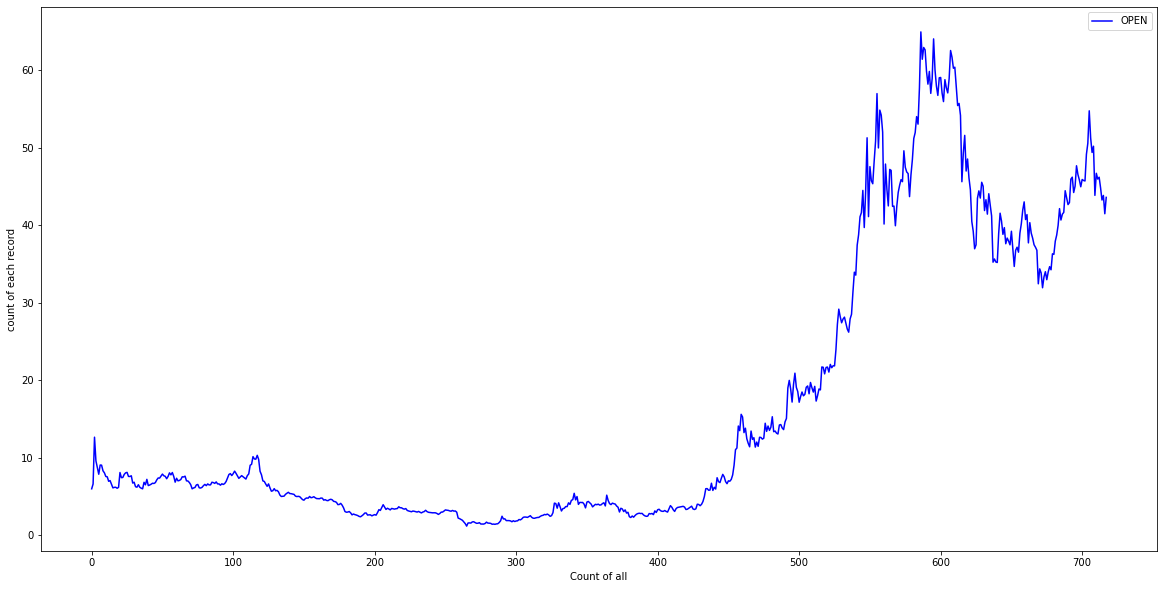

In [15]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['Open'].values,color='blue',label='OPEN')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 OPEN values

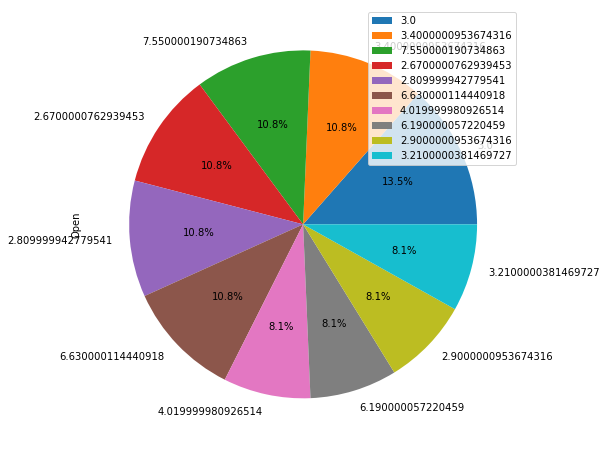

In [16]:
data["Open"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

### HIGH price values plot

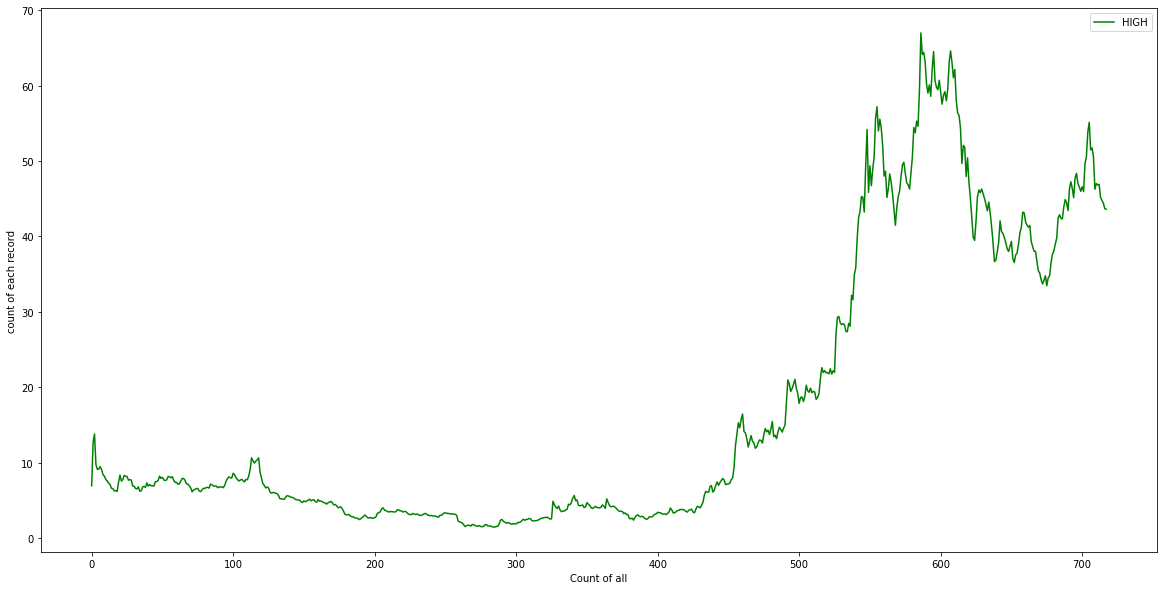

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['High'].values,color='green',label='HIGH')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 HIGH values

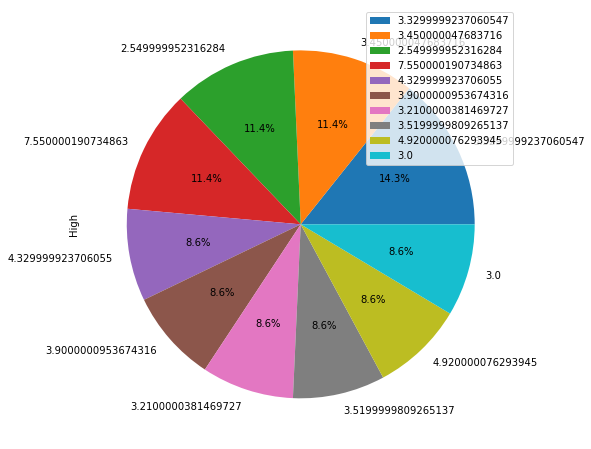

In [18]:
data["High"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

### LOW price values plot

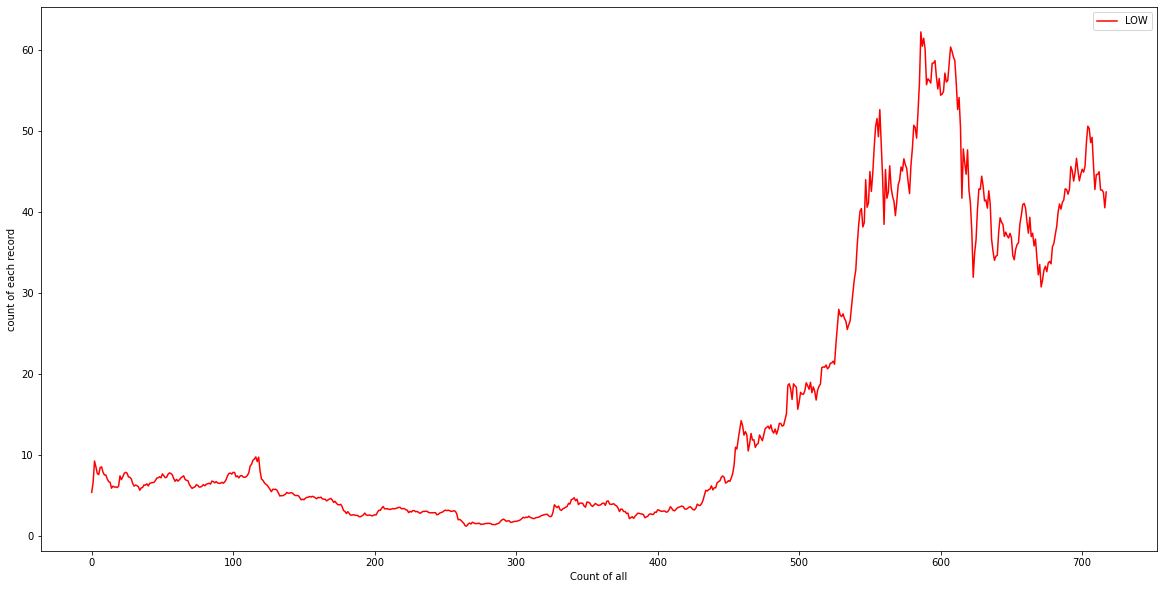

In [19]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['Low'].values,color='red',label='LOW')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 LOW values

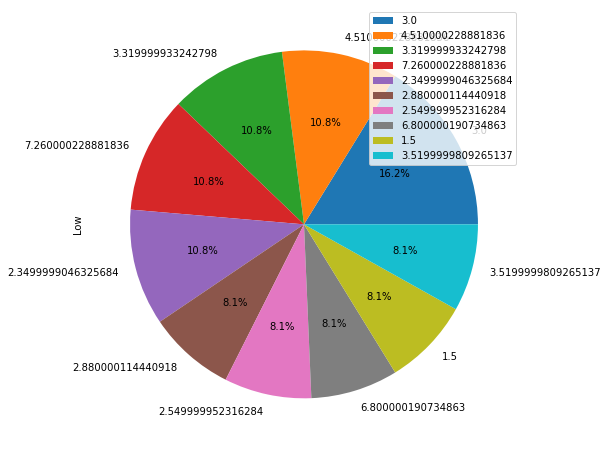

In [20]:
data["Low"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

### CLOSE price values plot

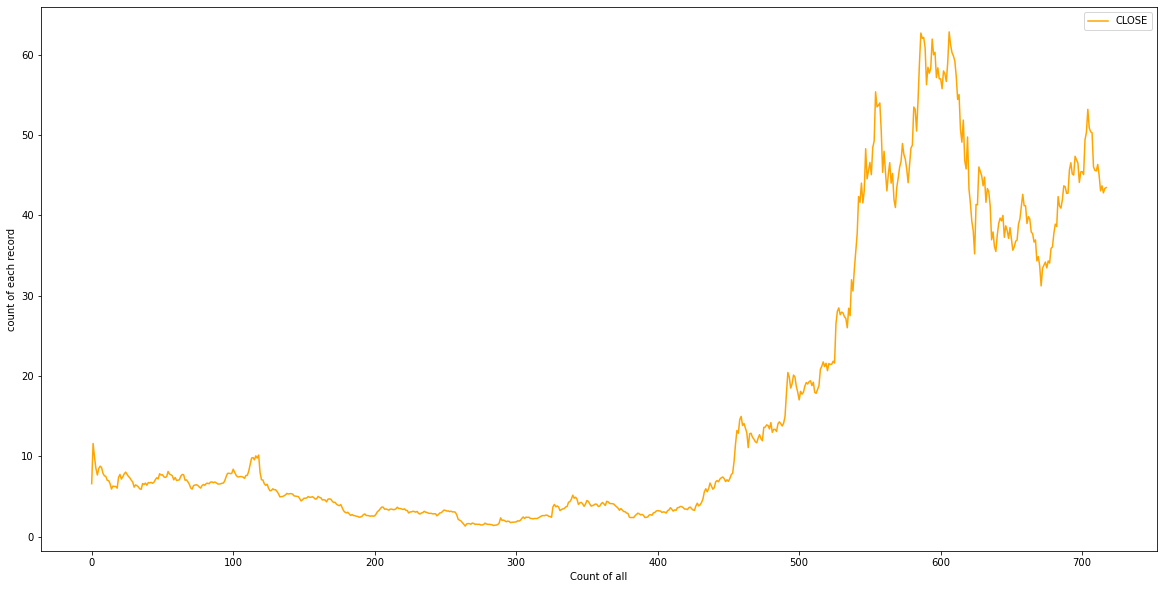

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['Close'].values,color='orange',label='CLOSE')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 CLOSE values

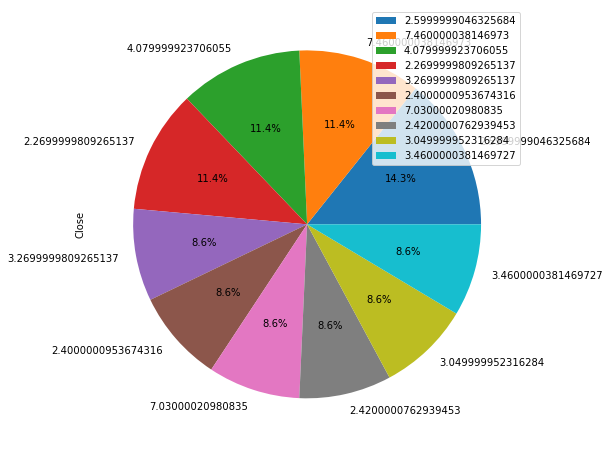

In [22]:
data["Close"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

# ------------------------------------------------------------------------------------------------------

# Data Preparation and Feature Extraction

# ------------------------------------------------------------------------------------------------------

### stochastic features 

In [23]:

from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

def stochastic(df, k, d):
    low_min  = df['Low'].rolling(window=k).min()
    high_max = df['High'].rolling( window=k).max()
    df['stochastic_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min)
    df['stochastic_d'] = df['stochastic_k'].rolling(window=d).mean()
    return df

stochs = stochastic(data, k=14, d=3)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_k.tail(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_d.tail(365), name='D stochastic'))
fig.show()

### EMA, MACD, MACD single features 

In [24]:

EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean())
MACD = pd.Series(EMA_12 - EMA_26)
data['MACD']=pd.Series(EMA_12 - EMA_26)
MACD_signal = pd.Series(MACD.ewm(span=9, min_periods=9).mean())
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD, name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD_signal, name='Signal line'), row=2, col=1)
fig.show()

<AxesSubplot:xlabel='Date'>

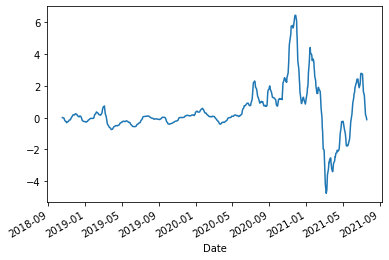

In [25]:
data['MACD'].plot()

### Moving average features

In [26]:
data['EMA_50'] = data['Close'].ewm(50).mean().shift()
data['EMA_200'] =data['Close'].ewm(200).mean().shift()
data['MA_50'] = data['Close'].rolling(50).mean()
data['MA_200'] = data['Close'].rolling(200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200'))
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200'))

fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

### Relative Strength Index RSI 7 and 14 features

In [28]:
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi


data['RSI 7'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 7']))
fig.show()

In [29]:
data['RSI 14'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 14']))
fig.show()

### Bollinger bands features

In [30]:
def bbands(price, length=30, numsd=2):
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

data['BB_Middle_Band'], data['BB_Upper_Band'], data['BB_Lower_Band'] = bbands(data['Close'], length=20, numsd=1)

In [31]:
fig = go.Figure(go.Scatter(x=data.index, y=data['BB_Middle_Band']))
fig.show()

### Calculation of Aroon Oscillator features

In [32]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df.index):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [33]:
listofzeros = [0] * 25
up, down = aroon(data)
aroon_list = [x - y for x, y in zip(up,down)]
if len(aroon_list)==0:
    aroon_list = [0] * data.shape[0]
    data['Aroon_Oscillator'] = aroon_list
else:
    data['Aroon_Oscillator'] = listofzeros+aroon_list

In [34]:
fig = go.Figure(go.Scatter(x=data.index, y=data['Aroon_Oscillator']))
fig.show()

### Average Directional Index features

In [35]:
data['ATR'] = data['Close'].rolling(window=14).mean()
def DMI(df, period):
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']
    df['Zero'] = 0

    df['PlusDM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > df['Zero']), df['UpMove'], 0)
    df['MinusDM'] = np.where((df['UpMove'] < df['DownMove']) & (df['DownMove'] > df['Zero']), df['DownMove'], 0)

    df['plusDI'] = 100 * (df['PlusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
    df['minusDI'] = 100 * (df['MinusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    df['ADX'] = 100 * (abs((df['plusDI'] - df['minusDI'])/(df['plusDI'] + df['minusDI']))).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
DMI(data, 14)

In [36]:
fig = go.Figure(go.Scatter(x=data.index, y=data['ADX']))
fig.show()

# Final Data after features extraction and preparation

In [37]:
data=data.replace(np.NaN, 0)
data

Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2018-09-12   6.000000   6.930000   5.350000   6.600000   66849000          0   
2018-09-13   6.620000  12.690000   6.520000  11.600000  158346500          0   
2018-09-14  12.660000  13.800000   9.220000   9.900000  172473600          0   
2018-09-17   9.610000   9.750000   8.500000   8.500000   56323900          0   
2018-09-18   8.730000   9.100000   7.670000   7.680000   41827600          0   
...               ...        ...        ...        ...        ...        ...   
2021-07-14  44.840000  45.169998  42.680000  43.049999   56805800          0   
2021-07-15  43.259998  44.770000  42.680000  43.680000   55860400          0   
2021-07-16  43.849998  44.400002  42.400002  42.799999   49803000          0   
2021-07-19  41.490002  43.669998  40.480000  43.349998   65213000          0   
2021-07-20  43.599701  43.610001  42.430099  43.459999   26325334          0   

            Stock Splits  stochastic_k  stochastic_d      MACD  ...  \
Date                                                            ...   
2018-09-12             0      0.000000      0.000000  0.000000  ...   
2018-09-13             0      0.000000      0.000000  0.000000  ...   
2018-09-14             0      0.000000      0.000000  0.000000  ...   
2018-09-17             0      0.000000      0.000000  0.000000  ...   
2018-09-18             0      0.000000      0.000000  0.000000  ...   
...                  ...           ...           ...       ...  ...   
2021-07-14             0      2.971879     16.689549  0.738068  ...   
2021-07-15             0      8.032128      9.662624  0.472308  ...   
2021-07-16             0      3.142166      4.715391  0.188510  ...   
2021-07-19             0     19.590434     10.254909  0.007887  ...   
2021-07-20             0     20.341292     14.357964 -0.124942  ...   

            Aroon_Oscillator        ATR    UpMove  DownMove  Zero    PlusDM  \
Date                                                                          
2018-09-12               0.0   0.000000  0.000000  0.000000     0  0.000000   
2018-09-13               0.0   0.000000  5.760000 -1.170000     0  5.760000   
2018-09-14               0.0   0.000000  1.110001 -2.700000     0  1.110001   
2018-09-17               0.0   0.000000 -4.050000  0.720000     0  0.000000   
2018-09-18               0.0   0.000000 -0.650000  0.830000     0  0.000000   
...                      ...        ...       ...       ...   ...       ...   
2021-07-14              60.0  47.612857 -1.740002  2.250000     0  0.000000   
2021-07-15              60.0  47.485715 -0.399998  0.000000     0  0.000000   
2021-07-16              60.0  47.323572 -0.369999  0.279999     0  0.000000   
2021-07-19             -40.0  46.891429 -0.730003  1.920002     0  0.000000   
2021-07-20             -44.0  46.400000 -0.059998 -1.950100     0  0.000000   

             MinusDM    plusDI   minusDI        ADX  
Date                                                 
2018-09-12  0.000000  0.000000  0.000000   0.000000  
2018-09-13  0.000000  0.000000  0.000000   0.000000  
2018-09-14  0.000000  0.000000  0.000000   0.000000  
2018-09-17  0.720000  0.000000  0.000000   0.000000  
2018-09-18  0.830000  0.000000  0.000000   0.000000  
...              ...       ...       ...        ...  
2021-07-14  2.250000  1.072171  1.916830  27.493194  
2021-07-15  0.000000  0.929215  1.661252  27.595287  
2021-07-16  0.279999  0.805320  1.518641  28.008478  
2021-07-19  1.920002  0.697944  1.862098  30.337221  
2021-07-20  0.000000  0.604884  1.613819  32.355464  

[718 rows x 29 columns]

# -----------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [38]:
X=data.drop('Close', axis=1)
X

Open       High        Low     Volume  Dividends  \
Date                                                                
2018-09-12   6.000000   6.930000   5.350000   66849000          0   
2018-09-13   6.620000  12.690000   6.520000  158346500          0   
2018-09-14  12.660000  13.800000   9.220000  172473600          0   
2018-09-17   9.610000   9.750000   8.500000   56323900          0   
2018-09-18   8.730000   9.100000   7.670000   41827600          0   
...               ...        ...        ...        ...        ...   
2021-07-14  44.840000  45.169998  42.680000   56805800          0   
2021-07-15  43.259998  44.770000  42.680000   55860400          0   
2021-07-16  43.849998  44.400002  42.400002   49803000          0   
2021-07-19  41.490002  43.669998  40.480000   65213000          0   
2021-07-20  43.599701  43.610001  42.430099   26325334          0   

            Stock Splits  stochastic_k  stochastic_d      MACD     EMA_50  \
Date                                                                        
2018-09-12             0      0.000000      0.000000  0.000000   0.000000   
2018-09-13             0      0.000000      0.000000  0.000000   6.600000   
2018-09-14             0      0.000000      0.000000  0.000000   9.124753   
2018-09-17             0      0.000000      0.000000  0.000000   9.388302   
2018-09-18             0      0.000000      0.000000  0.000000   9.159587   
...                  ...           ...           ...       ...        ...   
2021-07-14             0      2.971879     16.689549  0.738068  42.806331   
2021-07-15             0      8.032128      9.662624  0.472308  42.811109   
2021-07-16             0      3.142166      4.715391  0.188510  42.828146   
2021-07-19             0     19.590434     10.254909  0.007887  42.827594   
2021-07-20             0     20.341292     14.357964 -0.124942  42.837837   

            ...  Aroon_Oscillator        ATR    UpMove  DownMove  Zero  \
Date        ...                                                          
2018-09-12  ...               0.0   0.000000  0.000000  0.000000     0   
2018-09-13  ...               0.0   0.000000  5.760000 -1.170000     0   
2018-09-14  ...               0.0   0.000000  1.110001 -2.700000     0   
2018-09-17  ...               0.0   0.000000 -4.050000  0.720000     0   
2018-09-18  ...               0.0   0.000000 -0.650000  0.830000     0   
...         ...               ...        ...       ...       ...   ...   
2021-07-14  ...              60.0  47.612857 -1.740002  2.250000     0   
2021-07-15  ...              60.0  47.485715 -0.399998  0.000000     0   
2021-07-16  ...              60.0  47.323572 -0.369999  0.279999     0   
2021-07-19  ...             -40.0  46.891429 -0.730003  1.920002     0   
2021-07-20  ...             -44.0  46.400000 -0.059998 -1.950100     0   

              PlusDM   MinusDM    plusDI   minusDI        ADX  
Date                                                           
2018-09-12  0.000000  0.000000  0.000000  0.000000   0.000000  
2018-09-13  5.760000  0.000000  0.000000  0.000000   0.000000  
2018-09-14  1.110001  0.000000  0.000000  0.000000   0.000000  
2018-09-17  0.000000  0.720000  0.000000  0.000000   0.000000  
2018-09-18  0.000000  0.830000  0.000000  0.000000   0.000000  
...              ...       ...       ...       ...        ...  
2021-07-14  0.000000  2.250000  1.072171  1.916830  27.493194  
2021-07-15  0.000000  0.000000  0.929215  1.661252  27.595287  
2021-07-16  0.000000  0.279999  0.805320  1.518641  28.008478  
2021-07-19  0.000000  1.920002  0.697944  1.862098  30.337221  
2021-07-20  0.000000  0.000000  0.604884  1.613819  32.355464  

[718 rows x 28 columns]

### Taking target as output

In [39]:
y=data['Close']
y

Date
2018-09-12     6.600000
2018-09-13    11.600000
2018-09-14     9.900000
2018-09-17     8.500000
2018-09-18     7.680000
                ...    
2021-07-14    43.049999
2021-07-15    43.680000
2021-07-16    42.799999
2021-07-19    43.349998
2021-07-20    43.459999
Name: Close, Length: 718, dtype: float64

### Converting the input features and target into array

In [40]:
X=np.array(X)
y=np.array(y)

### Features Normalization

In [41]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# Spliting Dataset into 70% Training and 30% Testing

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# --------------------------------------------------------------------------------------------------

# Random Forest Model

In [43]:
RF=RandomForestRegressor()
RF= RF.fit(X_train , y_train)
RF

RandomForestRegressor()

# Evaluation Measures on Test data

# R2

In [44]:
y_pred_test = RF.predict(X_test)
rf_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(rf_test_rs,3))

R Squared :  0.999


# MSE

In [45]:
rf_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(rf_test_mse,3))

Mean Squared Error:  0.413


# MAE

In [46]:
rf_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(rf_test_MAE,3))

Mean Absolute Error:  0.343


# Predictions and Actual Stock Price

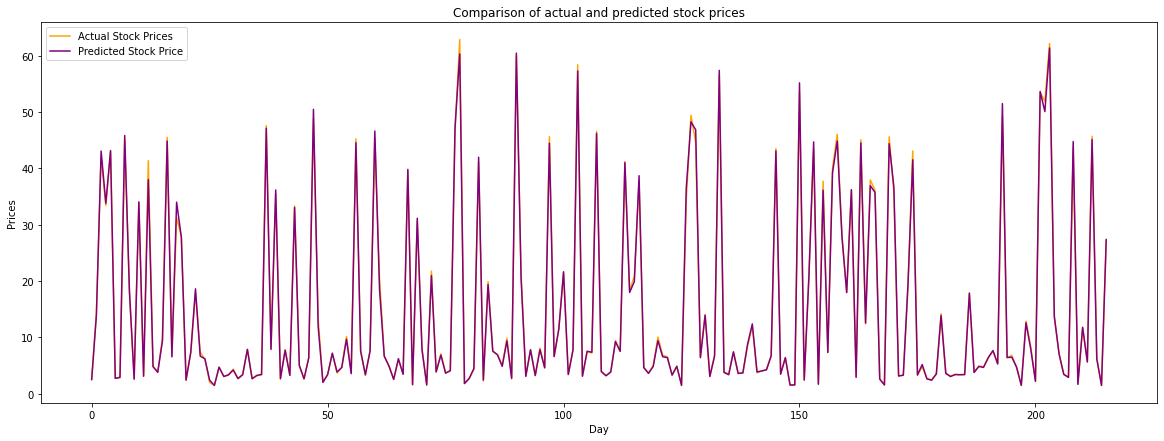

In [47]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='purple',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# XGBoost Model

In [48]:
XGB=XGBRegressor()
XGB= XGB.fit(X_train, y_train)
XGB

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluation Measures on Test data

# R2

In [49]:
y_pred_test = XGB.predict(X_test)
xgb_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(xgb_test_rs,3))

R Squared :  0.998


# MSE

In [50]:
XGB_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(XGB_test_mse,3))

Mean Squared Error:  0.686


# MAE

In [51]:
XGB_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(XGB_test_MAE,3))

Mean Absolute Error:  0.422


# Predictions and Actual Stock Price

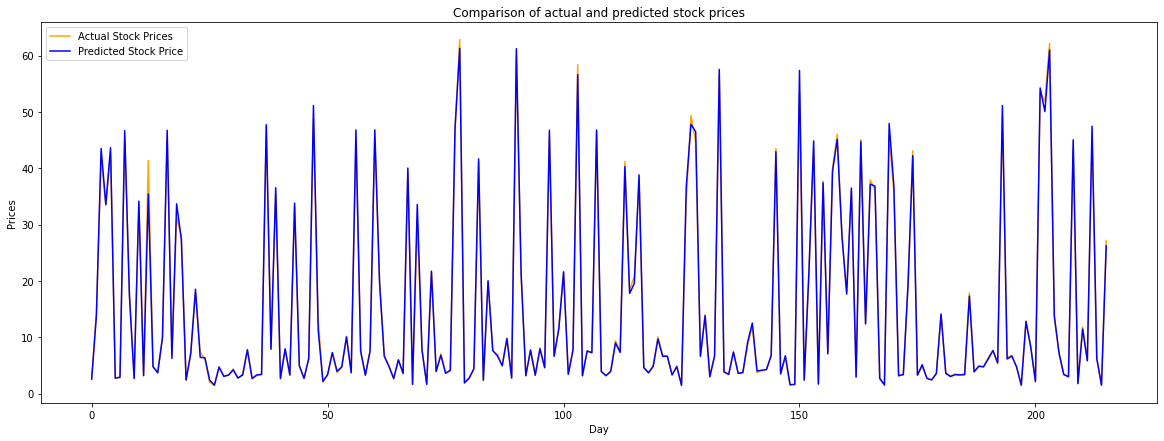

In [52]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='blue',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# Ensemble learning Model

In [53]:
RF_1=RandomForestRegressor()
XGB_1=XGBRegressor()

In [54]:
Hyib = VotingRegressor( estimators= [('RF',RF_1),('XGB',XGB_1)])
Hyib= Hyib.fit(X_train , y_train)
Hyib

VotingRegressor(estimators=[('RF', RandomForestRegressor()),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          ra

# Evaluation Measures on Test data

# R2

In [55]:
y_pred_test = Hyib.predict(X_test)
Hyib_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(Hyib_test_rs,3))

R Squared :  0.998


# MSE

In [56]:
Hyib_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(Hyib_test_mse,3))

Mean Squared Error:  0.478


# MAE

In [57]:
Hyib_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(Hyib_test_MAE,3))

Mean Absolute Error:  0.349


# Predictions and Actual Stock Price

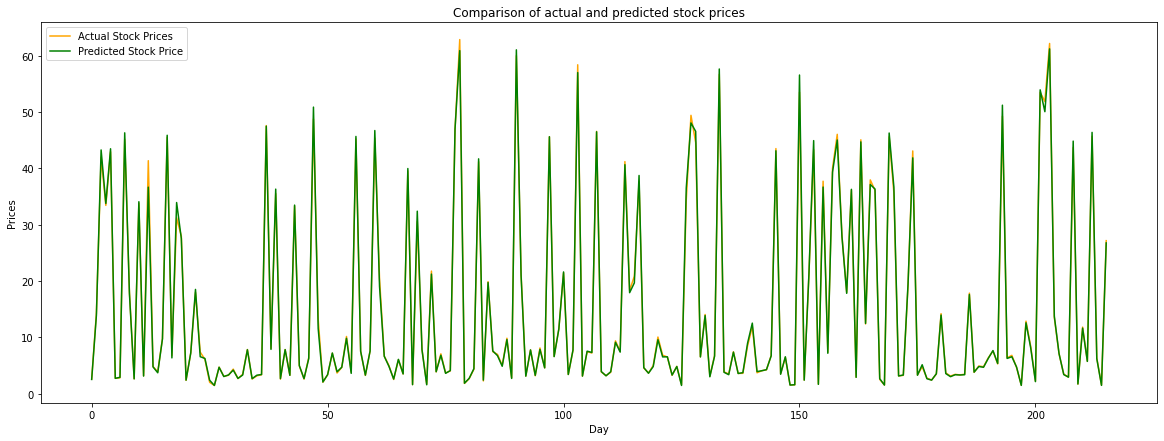

In [58]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='green',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# RNN Model

# ------------------------------------------------------------------------------------------------------

In [59]:
def RNN_model():
    RNN = Sequential()
    RNN.add(Dense(64,input_shape=(28,)))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    RNN.add(Dense(64))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    RNN.add(Dense(1))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    return RNN
RNN_model=RNN_model()
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [60]:
RNN_model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
RNN_model.fit(X_train, y_train, epochs=100, batch_size=1000)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 619.0546
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 583.6002
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 546.3215
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 486.6507
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 419.3749
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 348.6787
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 263.4870
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 247.6283
Epoch 9/100
1/1 [==============================] - 0s 1000us/step - loss: 237.9854
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 248.5468
Epoch 11/100
1/1 [==============================] - 0s 999us/step - loss: 278.3557
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 282.9240
Epoch 13/100
1/1 [==============

### R2

In [61]:
y_pred_test = RNN_model.predict(X_test)
RNN_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(RNN_test_rs,3))

R Squared :  0.913


### MSE

In [62]:
RNN_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(RNN_test_mse,3))

Mean Squared Error:  24.239


### MAE

In [63]:
RNN_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(RNN_test_MAE,3))

Mean Absolute Error:  3.226


# Predictions and Actual Stock Price

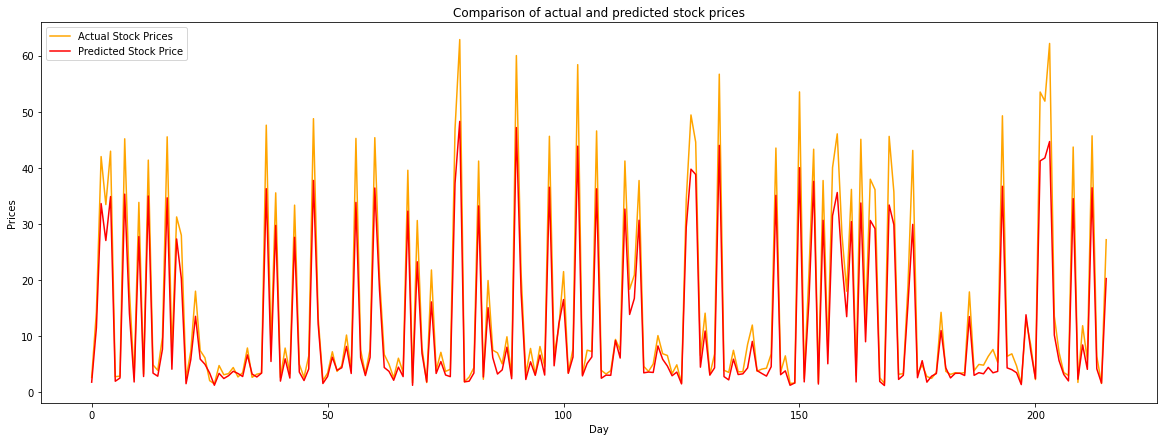

In [64]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='red',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------

# Comparison of all algorithms Results on R2 score

In [65]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "R2 Score"]


x.add_row(["Random Forest Algorithm", round(rf_test_rs,3)])
x.add_row(["XGB Algorithm",  round(xgb_test_rs,3)])
x.add_row(["Ensemble Learning Algorithm",  round(Hyib_test_rs,3)])
x.add_row(["Neural Network Model", round(RNN_test_rs,3)])


print(x)
print('\n')



Comparison of all algorithms
+-----------------------------+----------+
|            Model            | R2 Score |
+-----------------------------+----------+
|   Random Forest Algorithm   |  0.999   |
|        XGB Algorithm        |  0.998   |
| Ensemble Learning Algorithm |  0.998   |
|     Neural Network Model    |  0.913   |
+-----------------------------+----------+




# Comparison of all algorithms Results on MSE score

In [66]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "MSE score"]


x.add_row(["Random Forest Algorithm", round(rf_test_mse,3)])
x.add_row(["XGB Algorithm",  round(XGB_test_mse,3)])
x.add_row(["Ensemble Learning Algorithm",  round(Hyib_test_mse,3)])
x.add_row(["Neural Network Model", round(RNN_test_mse,3)])


print(x)
print('\n')



Comparison of all algorithms
+-----------------------------+-----------+
|            Model            | MSE score |
+-----------------------------+-----------+
|   Random Forest Algorithm   |   0.413   |
|        XGB Algorithm        |   0.686   |
| Ensemble Learning Algorithm |   0.478   |
|     Neural Network Model    |   24.239  |
+-----------------------------+-----------+




# Comparison of all algorithms Results on MAE score

In [67]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "MAE score"]


x.add_row(["Random Forest Algorithm", round(rf_test_MAE,3)])
x.add_row(["XGB Algorithm",  round(XGB_test_MAE,3)])
x.add_row(["Ensemble Learning Model",  round(Hyib_test_MAE,3)])
x.add_row(["Neural Network Model", round(RNN_test_MAE,3)])

print(x)
print('\n')



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
| Random Forest Algorithm |   0.343   |
|      XGB Algorithm      |   0.422   |
| Ensemble Learning Model |   0.349   |
|   Neural Network Model  |   3.226   |
+-------------------------+-----------+




# Graph of MSE of each algorithm

<AxesSubplot:xlabel='Algorithm'>

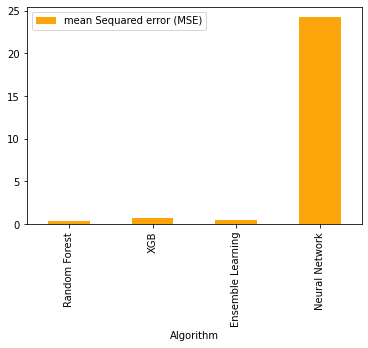

In [68]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'], 'mean Sequared error (MSE)': [rf_test_mse]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'mean Sequared error (MSE)': [XGB_test_mse]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'mean Sequared error (MSE)': [Hyib_test_mse]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'mean Sequared error (MSE)': [RNN_test_mse]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(.2, .4, 6))
Result_Comp.plot(kind='bar',figsize=(6, 4),stacked=True, color=color, legend=True)

# Graph of R2 of each algorithm

<AxesSubplot:xlabel='Algorithm'>

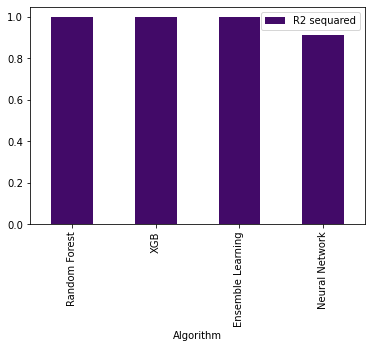

In [69]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'], 'R2 sequared': [rf_test_rs]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'R2 sequared': [xgb_test_rs]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'R2 sequared': [Hyib_test_rs]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'R2 sequared': [RNN_test_rs]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.8, 0.5, 2))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)

# Graph of MAE of each algorithm

<AxesSubplot:xlabel='Algorithm'>

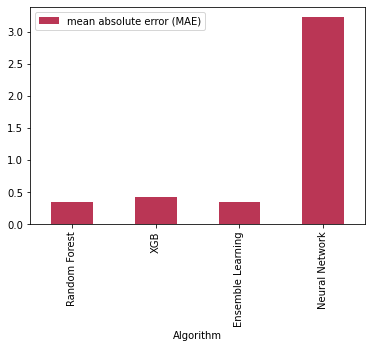

In [70]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'],'mean absolute error (MAE)': [rf_test_MAE]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'mean absolute error (MAE)': [XGB_test_MAE]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'mean absolute error (MAE)': [Hyib_test_MAE]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'mean absolute error (MAE)': [RNN_test_MAE]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.5, 0.2, 7))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)